# 『1과목 : 』AI기반 데이터 분석

## 『1-6』 데이터 준비(Data Preparation)

### Data Transformation (변환)

정규화 예

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 생성 (예시)
data = [[10], [5], [3], [2], [8]]

# 최소-최대 정규화 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print("정규화된 데이터:")
print(scaled_data)

정규화된 데이터:
[[1.   ]
 [0.375]
 [0.125]
 [0.   ]
 [0.75 ]]


표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 생성 (예시)
data = [[10], [5], [3], [2], [8]]

# 표준화 적용
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
print("표준화된 데이터:")
print(standardized_data)

표준화된 데이터:
[[ 1.46341823]
 [-0.19955703]
 [-0.86474714]
 [-1.19734219]
 [ 0.79822813]]


수치형 데이터 이산화 예

In [ ]:
import pandas as pd

# 예시 데이터
ages = pd.Series([18, 25, 33, 45, 60, 70])

# 구간 정의
bins = [17.948, 35.333, 52.667, 70.0]
labels = ['청년', '중년', '노년']

# 이산화 수행
age_groups = pd.cut(ages, bins=bins, labels=labels)

# 결과 출력
df = pd.DataFrame({'나이': ages, '연령대': age_groups})
print(df)

   나이 연령대
0  18  청년
1  25  청년
2  33  청년
3  45  중년
4  60  노년
5  70  노년


### Feature Engineering & Data Encoding

원핫 인코딩(One-Hot Encoding):

In [ ]:
import pandas as pd

# 샘플 데이터셋
data = {
    'color': ['red', 'blue', 'green', 'red', 'yellow']
}

# DataFrame 생성
df = pd.DataFrame(data)

# 원핫 인코딩 적용
df_encoded = pd.get_dummies(df['color'], prefix='color')

# 변환된 데이터 확인
print("변환된 데이터:")
print(df_encoded)


변환된 데이터:
   color_blue  color_green  color_red  color_yellow
0       False        False       True         False
1        True        False      False         False
2       False         True      False         False
3       False        False       True         False
4       False        False      False          True


라벨 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 예시
categories = ['고양이', '개', '고양이', '새', '개']

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 수행
encoded_labels = label_encoder.fit_transform(categories)
print(encoded_labels)


[1 0 1 2 0]


더미 변수화

In [ ]:
import pandas as pd

# 범주형 데이터 예시
data = {'pet': ['고양이', '개', '새', '고양이', '개']}
df = pd.DataFrame(data)

# 더미 변수화 (원-핫 인코딩)
dummy_variables = pd.get_dummies(df['pet'])

# 원본 데이터프레임과 더미 변수를 합치기
df_encoded = pd.concat([df, dummy_variables], axis=1)
print(df_encoded)

   pet      개    고양이      새
0  고양이  False   True  False
1    개   True  False  False
2    새  False  False   True
3  고양이  False   True  False
4    개   True  False  False


### Data Quality Assessment and Model Performance Evaluation

데이터 무결성

In [1]:
import pandas as pd

# 예시 데이터프레임
df = pd.DataFrame({
    '고객명': ['홍길동', '김철수', None],
    '생년': [1985, 2020, 1890],
    '이메일': ['hong@gmail.com', 'not-an-email', 'kim@naver.com']
})

# 평가 예시
print("결측치 확인:\n", df.isnull().sum())
print("생년 유효성 확인:\n", df[(df['생년'] < 1900) | (df['생년'] > 2024)])
print("이메일 유효성 확인:\n", df[~df['이메일'].str.contains('@')])

결측치 확인:
 고객명    1
생년     0
이메일    0
dtype: int64
생년 유효성 확인:
     고객명    생년            이메일
2  None  1890  kim@naver.com
이메일 유효성 확인:
    고객명    생년           이메일
1  김철수  2020  not-an-email


Metric Evaluation

Accuracy: 0.811704834605598
Precision: 0.7744360902255639
Recall: 0.7006802721088435
F1 Score: 0.7357142857142858
ROC AUC Score: 0.8635999115093191


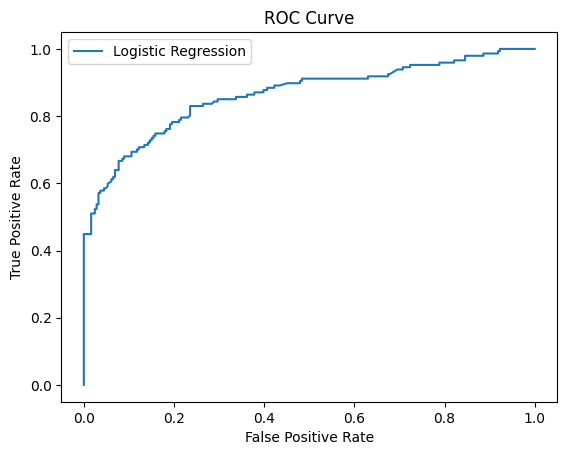

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("datasets/titanic_train.csv")
df_test = pd.read_csv("datasets/titanic_test.csv")
df_train.head(5)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 특성과 타깃 분리
X_train = df_train.drop(columns=['survived'])
y_train = df_train['survived']
X_test = df_test.drop(columns=['survived'])
y_test = df_test['survived']

# 문자열 데이터를 원-핫 인코딩하기 위한 열 선택
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(exclude=['object']).columns

# 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])
# Logistic Regression 분류 모델링

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# 로지스틱 회귀 모델을 포함한 파이프라인 생성
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0))
])

# 모델 학습
lr.fit(X_train, y_train)

# 테스트 데이터셋에 대한 예측
y_pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:, 1]

# 평가 지표 출력
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_probability)}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[216  30]
 [ 44 103]]
